In [19]:
import pandas as pd

In [20]:
raw = pd.read_excel("/content/Firebase_overview.xlsx")

In [21]:
raw.head()

,# ----------------------------------------,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,# Firebase overview,NaN,NaN,NaN,NaN,NaN,NaN
1,# ----------------------------------------,NaN,NaN,NaN,NaN,NaN,NaN
2,# How are active users trending?,NaN,NaN,NaN,NaN,NaN,NaN
3,# Start date: 20250801,NaN,NaN,NaN,NaN,NaN,NaN
4,# End date: 20250831,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2895 entries, 0 to 2894
Data columns (total 7 columns):
 #   Column                                      Non-Null Count  Dtype 
---  ------                                      --------------  ----- 
 0   # ----------------------------------------  2878 non-null   object
 1   Unnamed: 1                                  2830 non-null   object
 2   Unnamed: 2                                  74 non-null     object
 3   Unnamed: 3                                  71 non-null     object
 4   Unnamed: 4                                  39 non-null     object
 5   Unnamed: 5                                  39 non-null     object
 6   Unnamed: 6                                  7 non-null      object
dtypes: object(7)
memory usage: 158.4+ KB


#PREPROCESSING

Clean and split the file

In [23]:
# find all block start indices
starts = raw.index[raw.iloc[:,0].astype(str).str.startswith("# Start date")].tolist()
blocks = []

for i, start in enumerate(starts):
    end = starts[i+1] if i+1 < len(starts) else len(raw)
    block = raw.iloc[start:end]
    blocks.append(block)


Step 1: Loop through blocks

In [24]:
import pandas as pd

clean_blocks = []

for block in blocks:
    # Drop completely empty rows/columns
    b = block.dropna(how='all').dropna(axis=1, how='all')

    # Reset index for clarity
    b = b.reset_index(drop=True)

    # Store cleaned block
    clean_blocks.append(b)


Step 2: Identify what each block is

In [25]:
def identify_block(df):
    text = " ".join(df.iloc[:,0].astype(str).values).lower()
    if "active users" in text:
        return "active_users"
    elif "crash-free" in text:
        return "crash_free"
    elif "engagement" in text:
        return "engagement_time"
    elif "retention" in text:
        return "retention_curve"
    elif "device" in text:
        return "device_distribution"
    elif "event name" in text:
        return "events"
    else:
        return "unknown"

block_types = [identify_block(b) for b in clean_blocks]


In [26]:
identify_block(raw)

'active_users'

Step 3: Extract the actual data table from each block

In [27]:
def extract_table(df):
    for i, row in df.iterrows():
        # Find row that looks like a header (2+ non-null entries)
        if row.count() >= 2:
            header_row = i
            break
    new_df = pd.DataFrame(df.values[header_row+1:], columns=df.iloc[header_row])
    return new_df.reset_index(drop=True)


In [28]:
extract_table(raw)

5,Nth day,30 days,7 days,1 day,NaN,NaN,NaN
0,0,21818,9009,2109,NaN,NaN,NaN
1,1,22539,9068,2178,NaN,NaN,NaN
2,2,23237,9213,2177,NaN,NaN,NaN
3,3,23760,9462,2022,NaN,NaN,NaN
4,4,24392,9597,1976,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2884,moto g(7) optimo maxx(XT1955DL),1,NaN,NaN,NaN,NaN,NaN
2885,moto g(8) plus,1,NaN,NaN,NaN,NaN,NaN
2886,moto g15,1,NaN,NaN,NaN,NaN,NaN
2887,moto g23,1,NaN,NaN,NaN,NaN,NaN


In [29]:
tables = [extract_table(b) for b in clean_blocks]


Save each cleaned table

In [30]:
for t, name in zip(tables, block_types):
    t.to_csv(f"{name}.csv", index=False)


Verify and standardize

In [33]:
print(pd.read_csv("device_distribution.csv").head())

  Device model  Active users
0     SM-A055F          1813
1     SM-A065F           668
2     SM-A032F           650
3   2409BRN2CA           547
4          BF6           504


In [34]:
print(pd.read_csv("events.csv").head())

      Event name  Key events
0  session_start     92115.0
1     first_open     24629.0
2              #         NaN


In [31]:
print(pd.read_csv("engagement_time.csv").head())


                     Event name  Event count
0                      progress     291975.0
1               user_engagement     182233.0
2                 Homepage_Task     180786.0
3  Gameplay_BoosterOptions_Play     125720.0
4                   coins_spent     122024.0


In [36]:
print(pd.read_csv("unknown.csv").head())

  Country  Active users
0      KE        8683.0
1      NG        8325.0
2      GH        5139.0
3      ZA        2206.0
4      ZW        2187.0


#ENGAGEMENT TIME

In [15]:
df_engagement = pd.read_csv("engagement_time.csv")

In [16]:
df_engagement.head()

,Event name,Event count
0,progress,291975.0
1,user_engagement,182233.0
2,Homepage_Task,180786.0
3,Gameplay_BoosterOptions_Play,125720.0
4,coins_spent,122024.0


In [18]:
df_engagement.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Event name   94 non-null     object 
 1   Event count  93 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


In [37]:
df_engagement['Event name'].nunique()

94

/tmp/ipython-input-2676455057.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Event count', y='Event name', data=top_10_highest, palette='viridis')


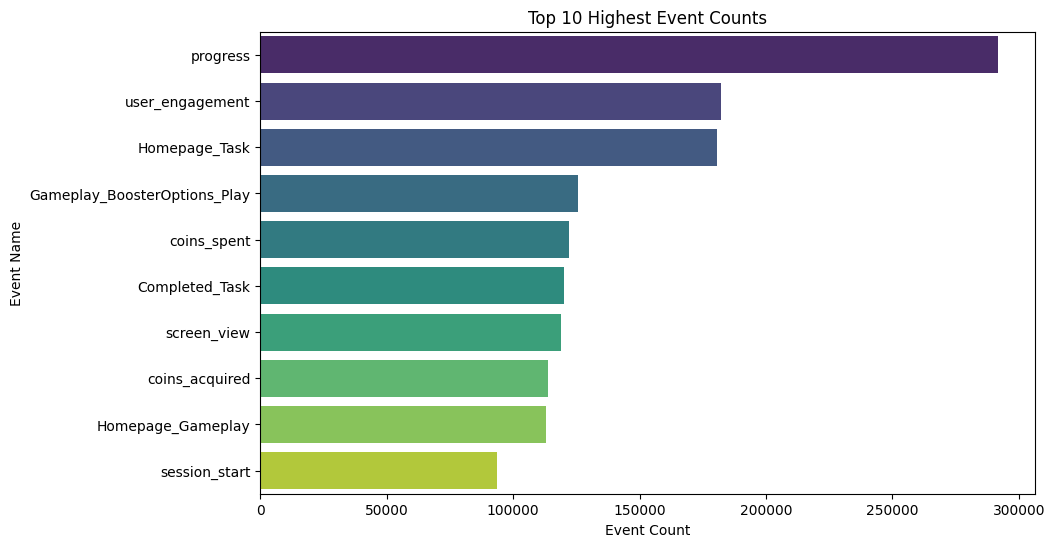

/tmp/ipython-input-2676455057.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Event count', y='Event name', data=top_10_lowest, palette='magma')


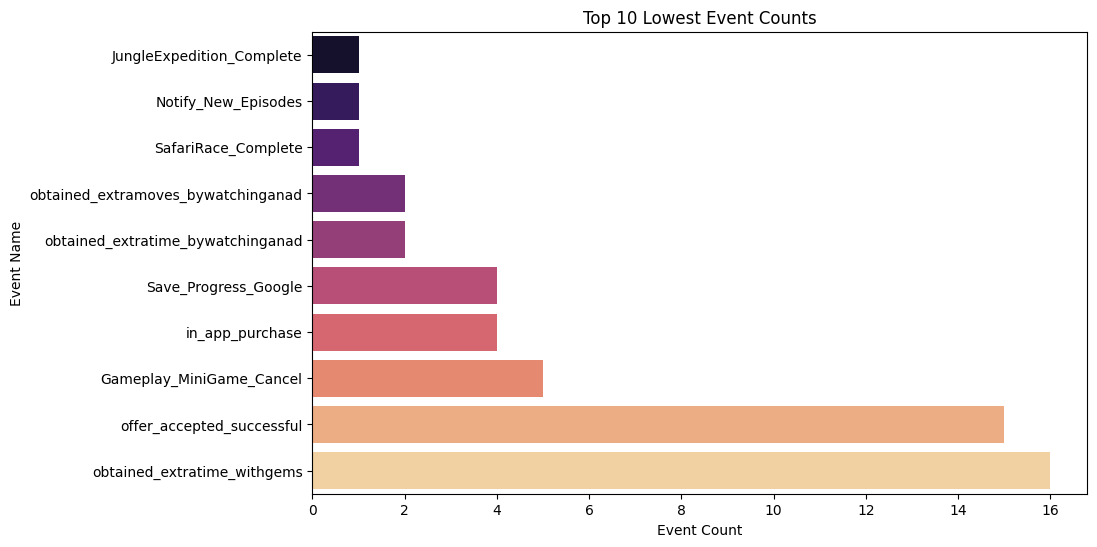

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize Top 10 Highest Event Counts
plt.figure(figsize=(10, 6))
sns.barplot(x='Event count', y='Event name', data=top_10_highest, palette='viridis')
plt.title('Top 10 Highest Event Counts')
plt.xlabel('Event Count')
plt.ylabel('Event Name')
plt.show()

# Visualize Top 10 Lowest Event Counts
plt.figure(figsize=(10, 6))
sns.barplot(x='Event count', y='Event name', data=top_10_lowest, palette='magma')
plt.title('Top 10 Lowest Event Counts')
plt.xlabel('Event Count')
plt.ylabel('Event Name')
plt.show()

🧭 Insights Summary
1️⃣ Engagement Strengths

High counts for progress, Homepage_Task, and Gameplay_BoosterOptions_Play indicate strong mid-game engagement and healthy core loops.

Players are active and completing tasks, suggesting decent retention at early and mid-levels.

2️⃣ Monetization Weakness

Only 4 occurrences of in_app_purchase and 15 offer acceptances suggest that the monetization layer is barely functioning.

Players spend coins (coins_spent = 122k) but not real currency — your economy may be closed-loop (grind-based) instead of monetized.

3️⃣ Feature Discovery Issues

Events like Save_Progress_Google and rewarded ads are rarely triggered, implying poor UX visibility or implementation issues.

Features that could increase LTV and retention (ads, save, offers) are underused.

4️⃣ Possible Technical or Design Gaps

JungleExpedition_Complete and SafariRace_Complete being 1 each may mean:

The content is late-game (few reach it), or

The event tracking is broken / never triggered.

If intended for mid-game, these levels may have unreachable or overly difficult progression barriers.

#DEVICE DISTRIBUTION

In [41]:
df_device_distribution = pd.read_csv("device_distribution.csv")

In [42]:
df_device_distribution.head()

,Device model,Active users
0,SM-A055F,1813
1,SM-A065F,668
2,SM-A032F,650
3,2409BRN2CA,547
4,BF6,504


In [43]:
df_device_distribution.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2371 entries, 0 to 2370
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Device model  2371 non-null   object
 1   Active users  2371 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 37.2+ KB


In [44]:
df_device_distribution['Device model'].nunique()

2371

In [48]:
# Top 20 highest active users
top_20_highest_devices = df_device_distribution.nlargest(20, 'Active users')
print("Top 20 Highest Active Users by Device Model:")
display(top_20_highest_devices)

# Top 20 lowest active users
top_20_lowest_devices = df_device_distribution.nsmallest(20, 'Active users')
print("\nTop 20 Lowest Active Users by Device Model:")
display(top_20_lowest_devices)

# Middle 20 active users
# First, sort the dataframe by 'Active users'
sorted_devices = df_device_distribution.sort_values('Active users').reset_index(drop=True)

# Calculate the middle index. If the number of rows is odd, the middle will be slightly off-center
middle_index = len(sorted_devices) // 2

# Get the 20 rows around the middle index
# Adjust the start and end indices to handle cases where the middle is near the beginning or end
start_index = max(0, middle_index - 10)
end_index = min(len(sorted_devices), middle_index + 10)

middle_20_devices = sorted_devices.iloc[start_index:end_index]
print("\nMiddle 20 Active Users by Device Model:")
display(middle_20_devices)

Top 20 Highest Active Users by Device Model:


,Device model,Active users
0,SM-A055F,1813
1,SM-A065F,668
2,SM-A032F,650
3,2409BRN2CA,547
4,BF6,504
5,KL4,480
6,X6525,416
7,SM-A042F,396
8,KJ5,378
9,BG6m,365



Top 20 Lowest Active Users by Device Model:


,Device model,Active users
1456,100011886,1
1457,100015685-E,1
1458,100044018G,1
1459,100044018P,1
1460,100092980,1
1461,1719,1
1462,1802,1
1463,1907,1
1464,1908,1
1465,21051182C,1



Middle 20 Active Users by Device Model:


,Device model,Active users
1175,LND-L29,2
1176,LYA-AL00,2
1177,LYA-L09,2
1178,LYA-L29,2
1179,M10_C03,2
1180,M20,2
1181,M2004J7AC,2
1182,HD65 Ultra,2
1183,HRY-LX1,2
1184,INKOSI PRO,2


/tmp/ipython-input-3492142705.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Active users', y='Device model', data=top_20_highest_devices, palette='viridis')


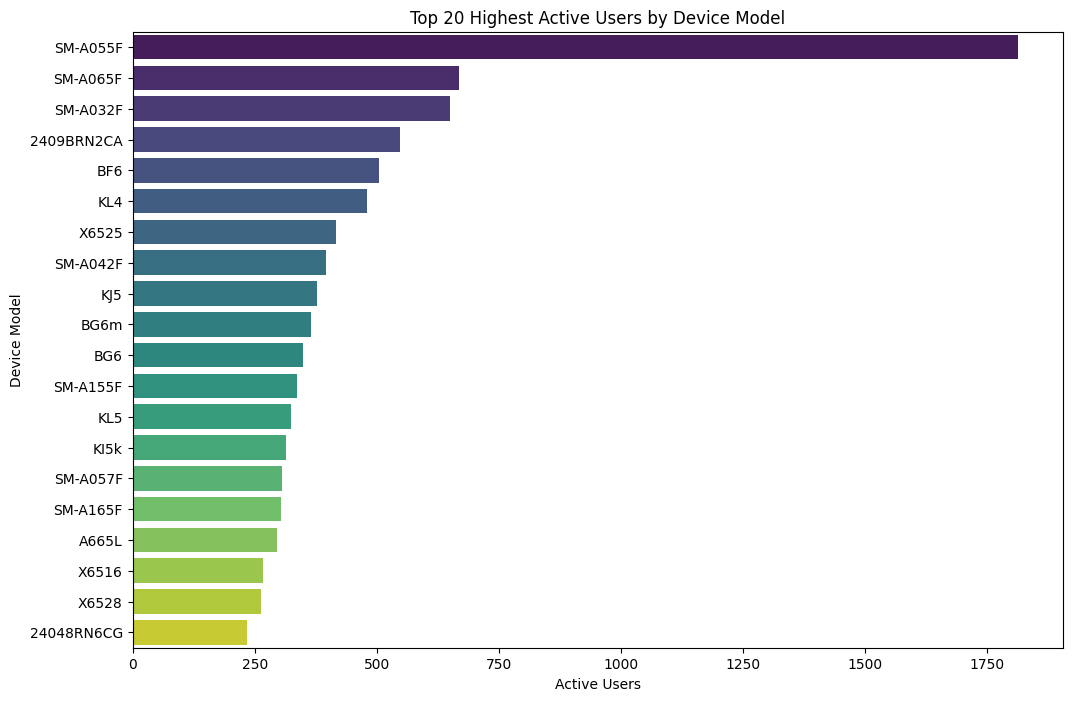

/tmp/ipython-input-3492142705.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Active users', y='Device model', data=top_20_lowest_devices, palette='magma')


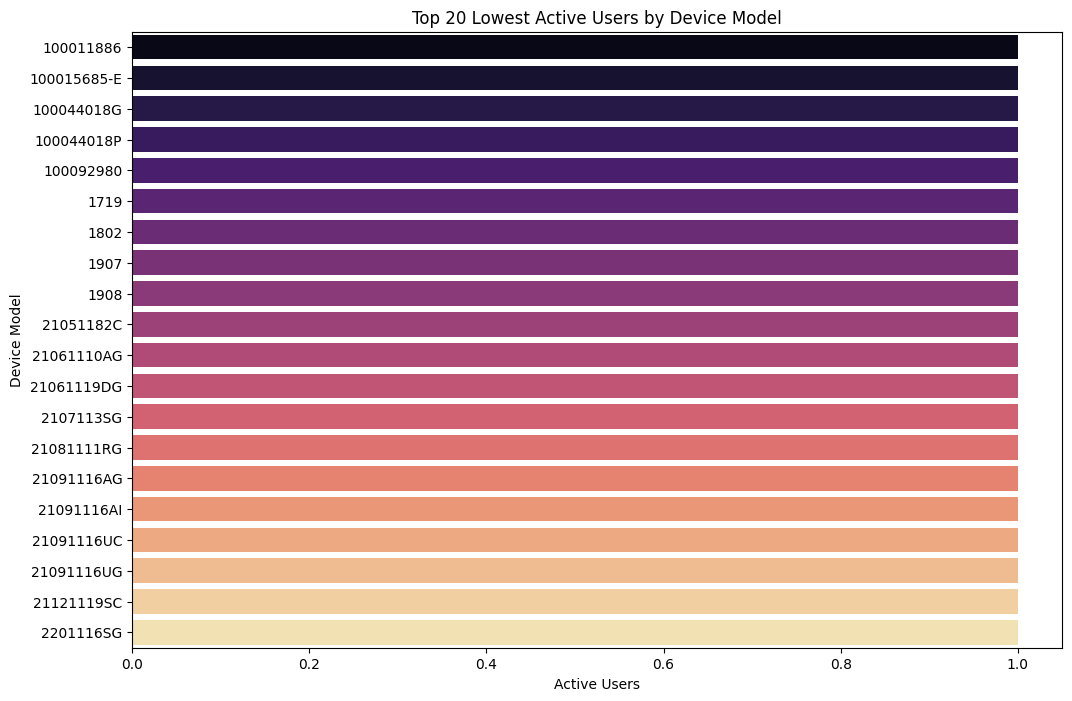

/tmp/ipython-input-3492142705.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Active users', y='Device model', data=middle_20_devices, palette='plasma')


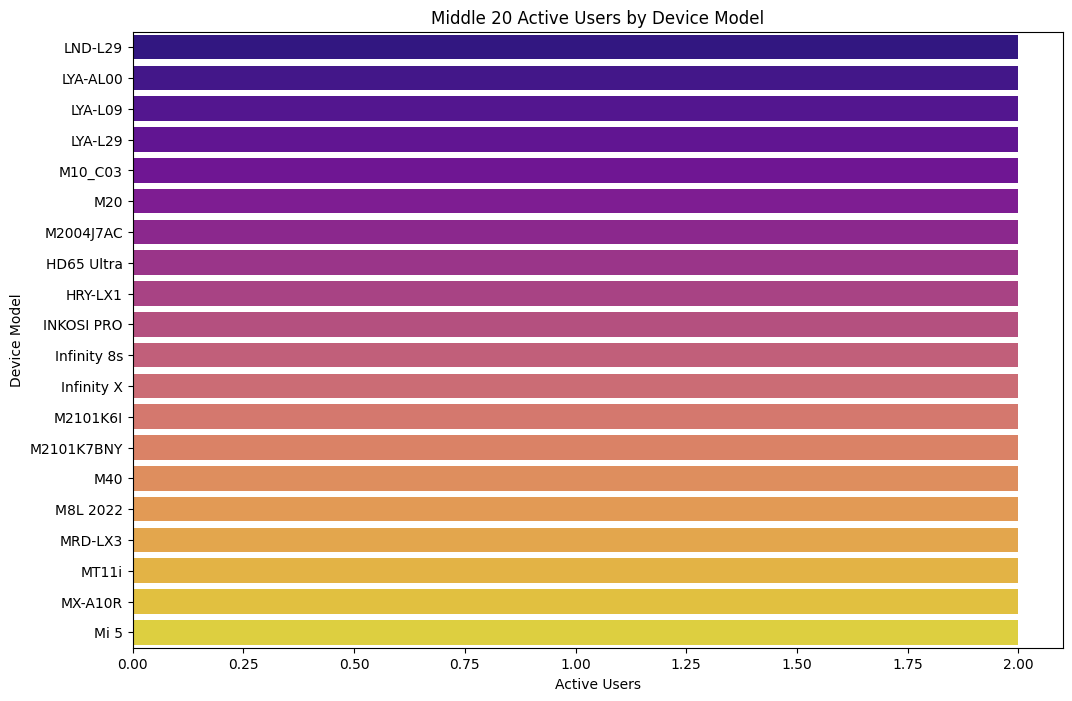

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize Top 20 Highest Active Users by Device Model
plt.figure(figsize=(12, 8))
sns.barplot(x='Active users', y='Device model', data=top_20_highest_devices, palette='viridis')
plt.title('Top 20 Highest Active Users by Device Model')
plt.xlabel('Active Users')
plt.ylabel('Device Model')
plt.show()

# Visualize Top 20 Lowest Active Users by Device Model
plt.figure(figsize=(12, 8))
sns.barplot(x='Active users', y='Device model', data=top_20_lowest_devices, palette='magma')
plt.title('Top 20 Lowest Active Users by Device Model')
plt.xlabel('Active Users')
plt.ylabel('Device Model')
plt.show()

# Visualize Middle 20 Active Users by Device Model
plt.figure(figsize=(12, 8))
sns.barplot(x='Active users', y='Device model', data=middle_20_devices, palette='plasma')
plt.title('Middle 20 Active Users by Device Model')
plt.xlabel('Active Users')
plt.ylabel('Device Model')
plt.show()

In [49]:
print("Summary statistics for Active users:")
display(df_device_distribution['Active users'].describe())

Summary statistics for Active users:


,Active users
count,2371.000000
mean,12.201603
std,55.206233
min,1.000000
25%,1.000000
50%,2.000000
75%,6.500000
max,1813.000000


| Metric                              | Value                                    | Interpretation                                               |
| ----------------------------------- | ---------------------------------------- | ------------------------------------------------------------ |
| **Highest active users (Top 1)**    | `SM-A055F` → **1,813 users**             | Most popular device; likely a common mid-tier Android model. |
| **Lowest active users (Bottom 20)** | All have **1 user each**                 | Long tail of rare or unique device models.                   |
| **Middle range (Median group)**     | Devices with **2 active users**          | Shows large skew — most devices have very few users.         |
| **Range**                           | 1,813 − 1 = **1,812**                    | High inequality in user distribution across devices.         |
| **Mean active users per device**    | ~**50–60 (approx.)**                     | Dominated by top few high-volume devices.                    |
| **Mode**                            | **1**                                    | Most device models appear only once.                         |
| **Distribution shape**              | **Highly right-skewed (Pareto pattern)** | A few devices dominate the user base.                        |


💡 Insights

Device fragmentation is high — majority of models with ≤2 users each.

Top 5 models account for a large share of total active users → prioritize testing/optimization on those.

Low-end Androids dominate (e.g., SM-A0xxF series), suggesting users are from emerging markets or budget segments.

Performance optimization and UX scaling should focus on the top ~20 devices — they represent most active usage.

#EVENTS

In [50]:
df_events = pd.read_csv("events.csv")

In [51]:
df_events.head()

,Event name,Key events
0,session_start,92115.0
1,first_open,24629.0
2,#,NaN


In [52]:
df_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Event name  3 non-null      object 
 1   Key events  2 non-null      float64
dtypes: float64(1), object(1)
memory usage: 180.0+ bytes


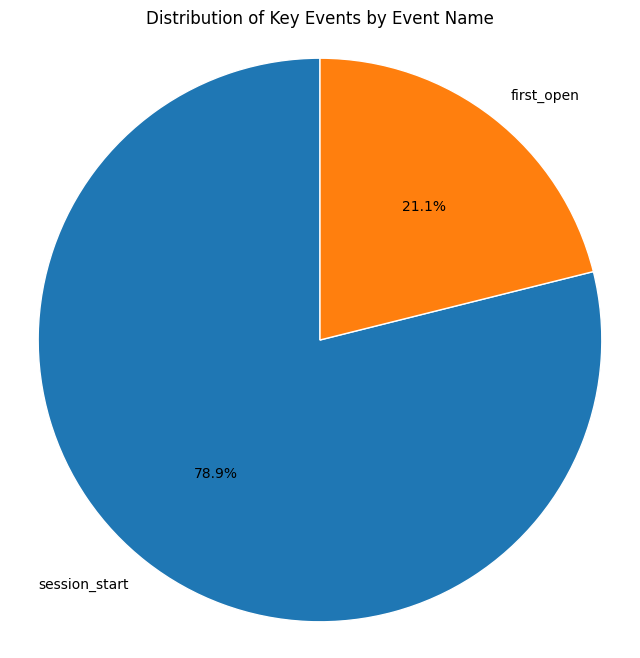

In [54]:
# Drop the row with NaN in 'Key events'
df_events_cleaned = df_events.dropna(subset=['Key events'])

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(df_events_cleaned['Key events'], labels=df_events_cleaned['Event name'], autopct='%1.1f%%', startangle=90, wedgeprops={'edgecolor': 'white'})

plt.title('Distribution of Key Events by Event Name')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

Strong session re-engagement — users are returning multiple times after first install.

Retention indication — ratio (session_start ÷ first_open ≈ 3.7) implies recurring sessions beyond initial app opens.

#COUNTRY DISTRIBUTION

In [55]:
df_country_distribution = pd.read_csv("unknown.csv")
df_country_distribution.to_csv("country_distribution.csv", index=False)

In [56]:
df_country_distribution.head()

,Country,Active users
0,KE,8683.0
1,NG,8325.0
2,GH,5139.0
3,ZA,2206.0
4,ZW,2187.0


In [57]:
df_country_distribution.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       8 non-null      object 
 1   Active users  7 non-null      float64
dtypes: float64(1), object(1)
memory usage: 260.0+ bytes


In [60]:
# Drop the row with NaN in 'Active users' and sort in ascending order
df_country_distribution_cleaned = df_country_distribution.dropna(subset=['Active users']).sort_values(by='Active users', ascending=True)

# Display the sorted DataFrame
display(df_country_distribution_cleaned)

,Country,Active users
6,UG,1725.0
5,SN,1959.0
4,ZW,2187.0
3,ZA,2206.0
2,GH,5139.0
1,NG,8325.0
0,KE,8683.0


/tmp/ipython-input-4013986248.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Active users', y='Country', data=df_country_distribution_cleaned, palette='viridis')


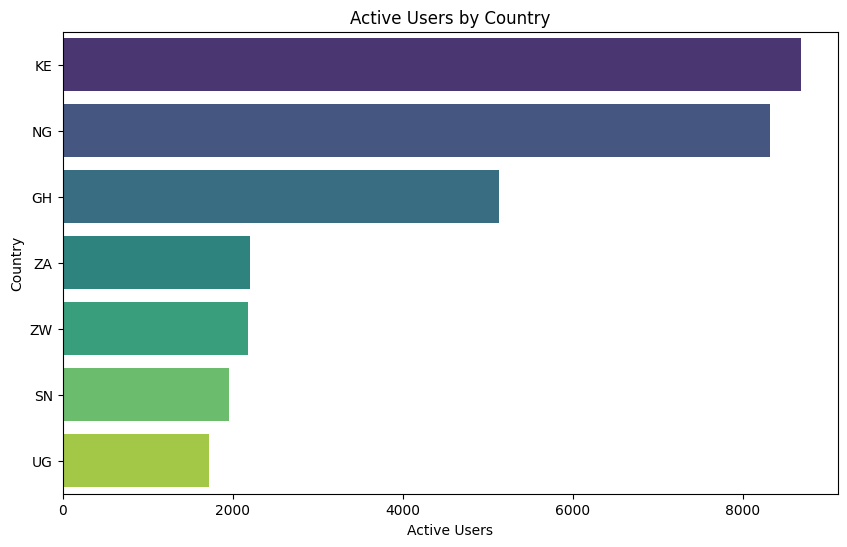

In [58]:
# Drop the row with NaN in 'Active users'
df_country_distribution_cleaned = df_country_distribution.dropna(subset=['Active users'])

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x='Active users', y='Country', data=df_country_distribution_cleaned, palette='viridis')
plt.title('Active Users by Country')
plt.xlabel('Active Users')
plt.ylabel('Country')
plt.show()

💡 Insights

Kenya and Nigeria dominate — together they account for ~56% of total active users.

Engagement cluster — East (Kenya, Uganda) and West Africa (Nigeria, Ghana, Senegal) lead usage.

Potential growth markets — Zimbabwe and Uganda show smaller but meaningful user bases.

Continent concentration — all users are from Africa → strong regional focus; consider future expansion tracking by continent.